###                   CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2018 ###

# 'Ride Later' feature for Uber (Taxi Dispatch Optimization)#

#### Han Wang (hwang729@wisc.edu), Ragini Rathore (rrathore3@wisc.edu), Wen-Fu Lee (wlee256@wisc.edu) and Zetong Qi (zq38@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Assumptions](#2.A.-Assumptions)
  1. [Model](#2.B.-Model)
1. [Solution](#3.-Solution)
  1. [Request Generation](#3.A.-Request-generation)
  1. [VRP Model Optimization](#3.B.-VRP-model-optimization)
  1. [Plot Functions](#3.C.-Plot-functions)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Experiments](#4.A.-Experiments)
  1. [Tradeoff Analysis](#4.B.-Tradeoff-analysis)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)


## 1. Introduction ##

Our project is focussed on **route optimization**.  A new 'RIDE LATER' feature in taxi-ride services provider like Uber can be introduced which actually schedules the requests booked for later. Currently, 'Ride Later' feature provided by Uber and other companies doesn't actually schedule a ride for later but book a ride with the driver 15 min before the scheduled time. Thus, we optimize the routing and scheduling of the static version of the **'Dial-A-Ride-Problem (DARP)'**.

In our project, we try to formulate the static DARP with time-varying travel times, hard time windows, single depot and homogeneous vehicles as a Mixed Integer optimization problem. Given the number of requests and its details like pickup and drop locations, pickup time and distance between pickup and drop location, our model tries to service each request and route the available cabs at the depot to each pickup location in such a way that the weighted combination of the number of cabs dispatched and the total distance covered by the fleet is minimum. All the cabs are dispached from the depot and they return back to the depot at the end of the day.

Since each request has a hard time window, it is interesting to note that the model dispatches another cab from the depot if the already dispatched cabs are serving another requests. For a cab which has already served a request and is near to the next requested pickup location, the model routes the same cab to next pickup request instead of dispatching another cab. The model looks at every aspect of the information available and generates an assignment matrix which shows the cab number assigned to each request. The problem is an NP-hard problem which includes scheduling along with routing.

In today’s on-demand economy, the taxi dispatch problem is everywhere. It doesn’t matter if you transport people, deliver food from restaurants, or pick up and drop off courier packages; the logistics of managing an on-demand fleet is all the same. All of these involve Route Optimization. Route optimization is about finding the shortest total driving time, given a fleet of vehicles and a host of requests with their constraints. This is also known as the **Vehicle Routing Problem (VRP)**[citations](https://epubs.siam.org/doi/pdf/10.1137/1.9780898718515.ch7). In our case, we need to solve a same-day **Pickup and Delivery Problem with Time-Windows (PDPTW)**. 
[citations](https://epubs.siam.org/doi/abs/10.1137/1.9780898718515.ch9)
 
### Data
We randomly generate pickup and dropoff locations with uniformly distributed request points from a randomly chosen centre and schedule rides based on the number of requests for the next day, availability of cabs, pickup and dropoff locations, pickup time and the duration of the ride.

Outline of the rest of the report
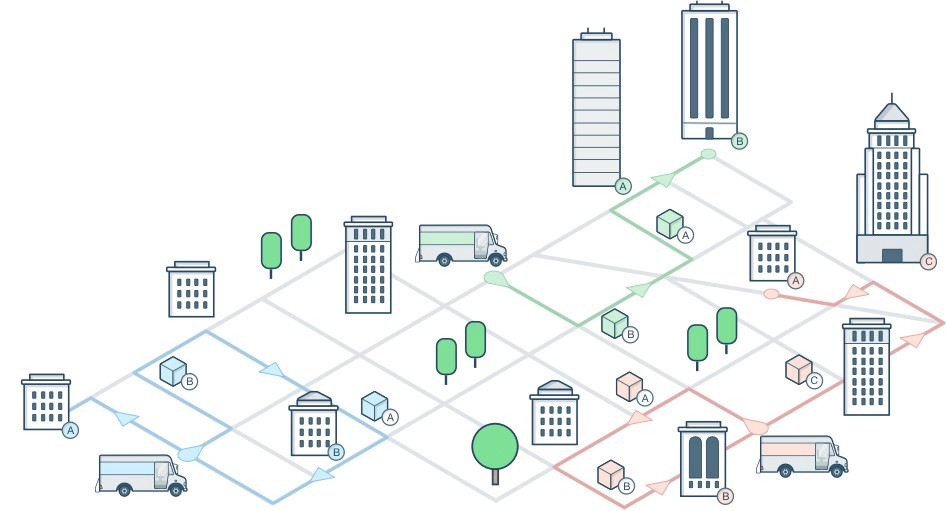

**Figure 1. Example - Routing of requests from pickup to drop locations.**

## 2. Mathematical model ##

### Details ###
In the project, we solve the problem with two different scenarios. First, we solve the main taxi dispatch problem that each request would assigned to one taxi. Any taxi can be assigned to any number of requests. In the second scenario, we add a constraint that each taxi can only be assigned to a limited number of requests. We will show how these two different scenarios are defined in this section and show the result in later sections.

## 2.A. Assumptions ##

The assumptions made for the project are listed as follows:

1.) All the request details, like pickup and delivery locations and time windows are known to the model.

2.) The model assumes the incoming requests are for a single passenger.

3.) All the cabs are identical and are driven at the same speed.

4.) Cabs are dispatched from a single depot and all the cabs return to the depot at the end of the day.

5.) It takes one unit of time to cover one unit of distance by all the cabs.

6.) Manhattan distance is used for all distance calculations.

7.) The assigned cab should not arrive later than the request's pickup time.

## 2.B. Model##

## Scenario #1
The below request-based mathematical formulation involves $R$ requests with pickup and dropoff locations and time windows.<br>
Define $2R+1$ nodes. Identify the first node as depot. Also, identify request $r$ by two nodes, $2r$ and $2r+1$, corresponding, respectively, to the pickup and dropoff stops of the requests. It is possible that different nodes may represent the same geographical location. 
#### Parameters:
$R=$ the number of requests<br>
$K=$ the number of cabs<br>
$p\_t[r]=$ the pickup time of request $r$<br> 
$d\_t[r]=$ the dropoff time of request $r$<br>
$dist\_map[i,j]=$ the Manhattan distance from node $i$ to $j$<br>
#### Variables:
$y[k]=\begin{cases}
    1 & \text{if cab k used}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall k=1:K$

$x[r,k]=\begin{cases}
    1 & \text{if request r is assigned to cab k}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall r=1:R$, $\forall k=1:K$

$mask[p,d,k]=\begin{cases}
    1 & \text{if node p to node d is travelled by cab k}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall p=1:2R+1$, $\forall d=1:2R+1$, $\forall k=1:K$

$more\_equal\_2[r_1,r_2,k]=\begin{cases}
    1 & \text{if $\sum_{r=r_1}^{r_2}x[r,k]\geq 2$}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall r_1=1:R$, $\forall r_2=1:R$, $\forall k=1:K$

$less\_equal\_2[r_1,r_2,k]=\begin{cases}
    1 & \text{if $\sum_{r=r_1}^{r_2}x[r,k]\leq 2$}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall r_1=1:R$, $\forall r_2=1:R$, $\forall k=1:K$

$equal\_2[r_1,r_2,k]=\begin{cases}
    1 & \text{if $\sum_{r=r_1}^{r_2}x[r,k]== 2$}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall r_1=1:R$, $\forall r_2=1:R$, $\forall k=1:K$

$two\_req[r_1,r_2,k]=\begin{cases}
    1 & \text{if both $r_1$ and $r_2$ are assigned to the cab k}\\
    0 & \text{otherwise}
    \end{cases}
$, $\forall r_1=1:R$, $\forall r_2=1:R$, $\forall k=1:K$

>sum1, sum2, sum3, sum4 are defined in [Expressions](#math-expression)


$more\_equal\_1\_for\_sum1[r,k]=\begin{cases}
    1 & \text{if $sum1[r,k]\geq 1$}\\
    0 & \text{otherwise}
\end{cases}
$, $\forall r=1:R$, $\forall k=1:K$

$less\_equal\_1\_for\_sum2[r,k]=\begin{cases}
    1 & \text{if $sum2[r,k]\leq 1$}\\
    0 & \text{otherwise}
\end{cases}
$, $\forall r=1:R$, $\forall k=1:K$

$more\_equal\_1\_for\_sum3[r,k]=\begin{cases}
    1 & \text{if $sum3[r,k]\geq 1$}\\
    0 & \text{otherwise}
\end{cases}
$, $\forall r=1:R$, $\forall k=1:K$

$less\_equal\_1\_for\_sum4[r,k]=\begin{cases}
    1 & \text{if $sum4[r,k]\leq 1$}\\
    0 & \text{otherwise}
\end{cases}
$, $\forall r=1:R$, $\forall k=1:K$

<a id="math-expression"></a>
#### Expressions:
$d[k]=\sum_{i=1}^{2R+1}\sum_{j=1}^{2R+1}dist\_map[i,i]\times mask[i,j,k]$, $\forall k=1:K$<br>
$sum1[r,k]=\sum_{r'=1}^rx[r',k]$,       $\forall r=1:R$, $\forall k=1:K$<br>
$sum2[r,k]=\sum_{r'=1}^rsum1[r',k]$,       $\forall r=1:R$, $\forall k=1:K$<br>
$sum3[r,k]=\sum_{r'=r}^Rx[r',k]$,     $\forall r=1:R$, $\forall k=1:K$<br>
$sum4[r,k]=\sum_{r'=r}^Rsum1[r',k]$,     $\forall r=1:R$, $\forall k=1:K$
#### Constraints:
1.) Connect route from depot to first pickup location for each cab<br>
if ($more\_equal\_1\_for\_sum1[r,k]$ and $less\_equal\_1\_for\_sum2[r,k]$) then mask route from node 1(depot) to $2r$ for cab $k$
$\rightarrow mask[1,2r,k]-1\geq m\cdot (1-more\_equal\_1\_for\_sum1[r,k]\cdot less\_equal\_1\_for\_sum2[r,k])$,
$\forall r=1:R$, $\forall k=1:K$, where $m=-1$

2.) Connect route from last dropoff location to depot for each cab<br>
if ($more\_equal\_1\_for\_sum3[r,k]$ and $less\_equal\_1\_for\_sum4[r,k]$) then mask route from node $2r+1$ to 1(depot) for cab $k$
$\rightarrow mask[2r+1,1,k]-1\geq m\cdot (1-more\_equal\_1\_for\_sum3[r,k]\cdot less\_equal\_1\_for\_sum4[r,k])$,
$\forall r=1:R$, $\forall k=1:K$, where $m=-1$

3.) Connect route between two consecutive requests assigned to each cab <br>
if ($equal\_2[r_1,r_2,k]$ and two_req[r_1,r_2,k]) then mask route from node $2r_1+1$ to $2r_2$ for cab $k$
$\rightarrow mask[2r_1+1,2r_2,k]-1\geq m\cdot(1-equal\_2[r_1,r_2,k]\cdot two\_req[r_1,r_2,k])$,
$\forall r_1=1:R-1$, $\forall r_2=(r_1+1):R$, $\forall k=1:K$, where $m=-1$

4.) Connect route from pickup to dropoff locations for each request<br>
if ($x[r,k]$) then mask route from node $2r$ to $2r+1$ for cab $k$<br>
$\rightarrow mask[2r,2r+1,k]-1\geq m\cdot (1-x[r,k])$, $\forall r=1:R$, $\forall k=1:K$, where $m=-1$

5.) Must dispatch one cab to each request<br>
$\sum_{k=1}^Kx[r,k]==1$, $\forall r=1:R$

6.) Dispatch cabs from the smallest number<br>
$y[k]\geq y[k+1]$, $\forall k=1:K-1$

7.) A dispatched cab must travel for some distance > 0<br>
$d[k]\begin{cases}
    =0 & \text{if }y[k]==0\\
    \geq 0 & \text{if }y[k]==1
\end{cases}\\
\rightarrow 
\begin{cases}
d[k]\leq M\cdot y[k] & \text{, }\forall k=1:K\text{, where }M=\sum_{i=1}^{2R+1}\sum_{j=1}^{2R+1}dist\_map[i,j]\\
d[k]\geq m\cdot (1-y[k])+\epsilon\cdot y[k] & \text{, }\forall k=1:K\text{, where }m=0\text{, }\epsilon=1
\end{cases}$

8.) Make sure that a cab can complete two requests in time if they are assigned to it<br>
if ($x[r_1,k]$ and $x[r_2,k]$) then $p\_t[r_2]-d\_t[r_1]\geq dist\_map[2r_1+1,2r_2]$<br>
$\rightarrow p\_t[r_2]-d\_t[r_1]-dist\_map[2r_1+1,2r_2]\geq m\cdot (1-x[r_1,k]\cdot x[r_2,k])$, 
$\forall r_1=1:R-1$, $\forall r_2=r_1+1:R$, $\forall k=1:K$,<br> 
$\text{    }$where $m=\min(p\_t)-\max(d\_t)-\max(dist\_map)$

9.) At most 1 cab can be assigned to each travel route between 2 nodes<br>
$\sum_{k=1}^K mask[i,j,k]\leq 1$, $\forall i=1:2R+1$, $\forall j=1:2R+1$

10.) Given one cab and one starting node, at most one ending node can be assigned<br>
$\sum_{j=1}^{2R+1}mask[i,j,k]\leq 1$, $\forall k=1:K$, $\forall i=1:2R+1$

#### Objective function:
Minimize the sum of (number of dispatched cabs + total travel distances by dispatched cabs)<br>
$$\min\sum_{k=1}^K \lambda\cdot y[k]+d[k]$$

## Scenario #2
#### Additional Parameter
limit = the upperbound requests that each cab can carry
#### Additional Constraint
11.) Each car can only carry limited number of requests
$\sum_{j=1}^R x[j,i]\leq limit$, $\forall i=1:K$


## 3. Solution ##

In this section, we adopt several libraries for the solution to our VRP model:<br>
(1) Using Julia + JuMP to implement our VRP model in section 2<br>
(2) Using Gurobi solver to minimize our objective<br>
(3) Using NamedArrays to make our data table look more organized<br>
(4) Using PyPlot to present our optimization results

In [2]:
using JuMP, Gurobi, NamedArrays, PyPlot

There are mainly two parts in our solution: generate_requests() and optmize_VRP_model() as below. Specifically, generate_requests() helps us build up the scenario setting, i.e., customer requests and a depot. On the other hand, optmize_VRP_model() helps us optimize our VRP model to obtain the optimal request schedule.

In [3]:
# Function: build up a VRP model
function VRP_model(R, K, lambda, limit = 0)
    #
    # [Input]
    # R: the number of customer requests
    # K: the number of cabs
    # lambda: the weighting of cab number in objective
    # limit: the larget number of requests assigned to one cab
    #
    requests, depot, dist_map, p_t, p_l, d_t, d_l, duration = generate_requests(R)
    y_best, d_best, mask_best = optmize_VRP_model(requests, depot, dist_map, p_t, p_l, d_t, d_l, duration, R, K, lambda, limit)
    return requests, depot, mask_best;
end

VRP_model (generic function with 2 methods)

## 3.A. Request generation ##

In this part, there are 3 steps to generate customer requests and a depot:<br>
(1) Generate the data of customer requests and a depot: genGrid()<br>
(2) Generate the distance map for each possible pair of locations: getLocations() and distance_matrix()<br>
(3) Shift all the request time for our assumption: assign_pickup_time()

In [4]:
# Function: generate requests
function generate_requests(R)
    #
    # [Input]
    # R: the number of customer requests
    #
    # [Output]
    # requests: customer requests
    # depot: depot location
    # dist_map: distance map for each possible pair of locations
    # p_t: pickup time for each request
    # p_l: pickup location for each request
    # d_t: dropoff time for each request
    # d_l: dropoff location for each request
    # duration: travel duration for each request
    #
    # Generate all input data
    requests, depot = genGrid(R, 1)
    
    # Get Location coordinates.
    nodes = getLocations(depot, requests)

    # Compute distance matrix
    dist_map = distance_matrix(nodes, length(requests));

    # Find max distance from the depot to a pickup and use it as the reference time to start the TimeSlots for requests
    maxDistFromDepot = maximum(dist_map[:,1])

    # Now, assign random time slots beginning from maxDistFromDepot to all requests.
    requests = assign_pickup_time(maxDistFromDepot, requests)
    
    #plot_Request_Time_Window(requests)   # Calling this function here coz of modified slots.

    p_t = []
    p_l = []
    d_t = []
    d_l = []
    duration = []

    println("")
    for r = 1:R
        push!(p_t, requests[r].pickup_time)
        push!(p_l, requests[r].pickup_pos)
        push!(d_t, requests[r].pickup_time + requests[r].duration)
        push!(d_l, requests[r].dropoff_pos)
        push!(duration, requests[r].duration)
    end
    return requests, depot, dist_map, p_t, p_l, d_t, d_l, duration
end

generate_requests (generic function with 1 method)

For building up our VRP model, we need to generate our data first, including customer requests and a depot. To make codes more neat, we declare Request type and Depot type for customer requests and a depot, respectively.<br>
(1) Request attribute:  pickup position, pickup time, dropoff position, travel duration<br>
(2) Depot attribute:  current position

In [5]:
WIDTH = 51 # odd number
HEIGHT = 41 # odd number
NRG = min(WIDTH, HEIGHT)

# Declare Request type
type Request
    pickup_pos::Tuple{Int64, Int64}
    pickup_time::Int
    dropoff_pos::Tuple{Int64, Int64}
    duration::Int
end

# Declare Depot type
type Depot
    cur_pos::Tuple{Int64, Int64}
end

Here, we adopt Manhattan distance, manhattan_distance(), for calculating the distances traveled by our cabs; we generate the pickup and dropoff locations for each customer request and the depot location based on uniform distribution, rand_uniform_xy(). Then, according to the numbers of requests and depots, we generate all the required information on a predefined map by genGrid().

In [6]:
# Function: calculate Manhattan distance
function manhattan_distance(a, b)
    return sum(abs.([i for i in a]-[i for i in b]))
end

# Function: generate uniformly distributed locations
function rand_uniform_xy()
   return (rand(1:WIDTH), rand(1:HEIGHT)) 
end

# Function: generate a map with requests and deopt
function genGrid(n_req, n_depot)
    requests = Request[]
    depot = Depot[]
    ptime = sort(rand(50:500,n_req))
    for i=1:n_req
        ppos = rand_uniform_xy()
        dpos = rand_uniform_xy()
        p = Request(ppos, ptime[i], dpos, manhattan_distance(ppos,dpos))
        push!(requests, p)
    end
    for i=1:n_depot
        d = Depot((Int((WIDTH+1)/2), Int((HEIGHT+1)/2)))
        push!(depot, d)
    end
    #plot_request_depot(requests, depot)   #### Function call to plot 
    for i=1:length(requests)
        println(i, ": ", requests[i])
    end
    return requests,depot
end

genGrid (generic function with 1 method)

Here, we build up a distance matrix by distance_matrix(). With this distance matrix, every time when we want to calculate any distance between two locations, we can just look up this table. It's easy and efficient.

In [7]:
# Function: get the coordinates of all depot and pickup, drop locations of requests (in order of request)
# Can be modified to be called within distance matrix
function getLocations(depot, requests)
    nodes = []
    for d in depot             # Right now, considering only single depot.
        depot_node = d.cur_pos
        push!(nodes, depot_node)
    end

    for r in requests
        push!(nodes, r.pickup_pos)
        push!(nodes, r.dropoff_pos)
    end
    return nodes
end

# # Function: generate distance matrix
function distance_matrix(nodes, numReq)
    
    # Creating names for nodes
    points = []
    i = 0
    push!(points,"Depot")
    for r in 1:numReq
        i = i+1
        pickup = string("P_",i)
        drop = string("D_",i)
        push!(points,pickup)
        push!(points,drop)
    end
    #println(numReq)
    println(points)

    # Compute distance matrix for the Agencies
    pointA = nodes
    pointB = copy(nodes)

    nodeLen = length(nodes) # nodes include pickup, dropoff and depot

    D = zeros(nodeLen,nodeLen)

    for j = 1:nodeLen
        for i = 1:nodeLen
            D[i, j] = abs(pointA[j][1] - pointB[i][1]) + abs(pointA[j][2] - pointB[i][2])
        end
    end
    #println("Distance matrix : ",D)
    println("")

    dist_matrix = NamedArray(D,(points,points),("From","To"))
    #show(IOContext(STDOUT, displaysize=(2000, 2000)), dist_matrix)
    #points
    return dist_matrix
end

distance_matrix (generic function with 1 method)

In order to make sure that our cabs can always get to the first requests on time, we will find max distance from the depot to all the pickup locations, and use it as the reference time.

In [8]:
# Function: assign random request times for each request
function assign_pickup_time(startT, requests)
    endT = startT + 200 + 50*length(requests)
    ptime = sort(rand(startT:endT, length(requests)))
    #println(ptime)
    k = 1
    for r in requests
        r.pickup_time = ptime[k]
        k = k + 1
    end
    return requests
end

assign_pickup_time (generic function with 1 method)

## 3.B. VRP model optimization ##

In this part, we implement the variables, the constraints, and the objective in section 2.B.

In [9]:
# Function: optmize VRP model
function optmize_VRP_model(requests, depot, dist_map, p_t, p_l, d_t, d_l, duration, R, K, lambda, limit = 0)
    #
    # [Input]
    # requests: customer requests
    # depot: depot location
    # dist_map: distance map for each possible pair of locations
    # p_t: pickup time for each request
    # p_l: pickup location for each request
    # d_t: dropoff time for each request
    # d_l: dropoff location for each request
    # duration: travel duration for each request
    # R: the number of customer requests
    # K: the number of cabs
    # lambda: the weighting of cab number in objective
    #
    # [Output]
    # getvalue(y): the optimal y
    # getvalue(d): the optimal d
    # getvalue(mask): the optimal mask
    #
    Big_M = sum(dist_map)
    Big_M2 = R*R
    small_m = minimum(p_t) - maximum(d_t) - maximum(dist_map)
    small_m2 = 0
    small_m3 = -1
    epsilon = 1

    m = Model(solver=GurobiSolver(OutputFlag=0))

    @variable(m, y[1:K], Bin)                          # if the cab is dispatched or not
    @variable(m, x[1:R, 1:K], Bin)                     # if the request is assigned to the cab or not
    @variable(m, mask[1:2R+1, 1:2R+1, 1:K], Bin)       # Given one cab, if the node p to node d is connected or not
    @variable(m, more_equal_2[1:R, 1:R, 1:K], Bin)     # summation >= 2 -> more_equal_2 is true
    @variable(m, less_equal_2[1:R, 1:R, 1:K], Bin)     # summation <= 2 -> less_equal_2 is true
    @variable(m, equal_2[1:R, 1:R, 1:K], Bin)          # summation == 2 -> equal_2 is true
    @variable(m, two_req[1:R, 1:R, 1:K], Bin)          # both requests assigned to the same cab -> two_req is true
    @variable(m, more_equal_1_for_sum1[1:R, 1:K], Bin) # sum1 >= 1 <-> more_equal_1_for_sum1 is true
    @variable(m, less_equal_1_for_sum2[1:R, 1:K], Bin) # sum2 <= 1 <-> less_equal_1_for_sum2 is true
    @variable(m, more_equal_1_for_sum3[1:R, 1:K], Bin) # sum3 >= 1 <-> more_equal_1_for_sum3 is true
    @variable(m, less_equal_1_for_sum4[1:R, 1:K], Bin) # sum4 <= 1 <-> less_equal_1_for_sum4 is true

    @expression(m, d[k in 1:K], sum(dist_map[p, d] * mask[p, d, k] for p in 1:2R+1, d in 1:2R+1)) # Express the total travel distance of each cab
    @expression(m, sum1[r in 1:R, k in 1:K], sum(x[i,k] for i in 1:r))    # summation from the index 1 to i of x
    @expression(m, sum2[r in 1:R, k in 1:K], sum(sum1[i,k] for i in 1:r)) # summation from the index 1 to i of sum1 
    @expression(m, sum3[r in 1:R, k in 1:K], sum(x[i,k] for i in r:R))    # summation from the index i to R of x
    @expression(m, sum4[r in 1:R, k in 1:K], sum(sum3[i,k] for i in r:R)) # summation from the index i to R of sum3

    # Each car can only carry limited number of requests
    if limit != 0            
        for i in 1:K
            @constraint(m, sum(x[j,i] for j in 1:R) <= limit)
        end
    end
    
    # Connect route from depot to first pickup location for each cab
    for k = 1:K
        for r = 1:R
            @constraint(m, sum1[r,k] - 1 <= R*more_equal_1_for_sum1[r,k] - epsilon*(1-more_equal_1_for_sum1[r,k])) 
            @constraint(m, sum1[r,k] - 1 >= small_m3*(1-more_equal_1_for_sum1[r,k]))
            @constraint(m, sum2[r,k] - 1 >= small_m3*less_equal_1_for_sum2[r,k] + epsilon*(1-less_equal_1_for_sum2[r,k]))
            @constraint(m, sum2[r,k] - 1 <= Big_M2*(1-less_equal_1_for_sum2[r,k]))
            @constraint(m, mask[1, 2*r, k] - 1 >= small_m3*(1 - more_equal_1_for_sum1[r,k]*less_equal_1_for_sum2[r,k]))
        end
    end

    # Connect route from last dropoff location to depot for each cab
    for k = 1:K
        for r = 1:R
            @constraint(m, sum3[r,k] - 1 <= R*more_equal_1_for_sum3[r,k] - epsilon*(1-more_equal_1_for_sum3[r,k])) 
            @constraint(m, sum3[r,k] - 1 >= small_m3*(1-more_equal_1_for_sum3[r,k]))
            @constraint(m, sum4[r,k] - 1 >= small_m3*less_equal_1_for_sum4[r,k] + epsilon*(1-less_equal_1_for_sum4[r,k]))
            @constraint(m, sum4[r,k] - 1 <= Big_M2*(1-less_equal_1_for_sum4[r,k]))
            @constraint(m, mask[2*r+1, 1, k] - 1 >= small_m3*(1 - more_equal_1_for_sum3[r,k]*less_equal_1_for_sum4[r,k]))
        end
    end

    # Connect route between two consecutive requests assigned to each cab 
    for r1 = 1:R-1
        for r2 = (r1+1):R
            for k = 1:K
                @constraint(m, sum(x[r1:r2,k])-2 <= (R-2)*more_equal_2[r1, r2, k]-(1-more_equal_2[r1, r2, k]))
                @constraint(m, sum(x[r1:r2,k])-2 >= (-2)*less_equal_2[r1, r2, k]+(1-less_equal_2[r1, r2, k]))
                @constraint(m, equal_2[r1, r2, k] - 1 >= small_m3*(1-more_equal_2[r1, r2, k]*less_equal_2[r1, r2, k]))
                @constraint(m, two_req[r1, r2, k] - 1 >= small_m3*(1 - (x[r1, k]*x[r2, k])))
                @constraint(m, mask[2*r1+1, 2*r2, k] - 1 >= small_m3*(1 - equal_2[r1, r2, k]*two_req[r1, r2, k]))
            end
        end
    end

    # Connect route from pickup to dropoff locations for each request
    for r = 1:R
        for k = 1:K
            # if x[r, k] == 1 => mask[2r, 2r+1, k] == 1
            @constraint(m, mask[2r, 2r+1, k] - 1 >= small_m3*(1 - x[r, k]))
        end
    end

    # Must dispatch one cab to each request
    @constraint(m, constraint1[r in 1:R], sum(x[r, k] for k =1:K) == 1)

    # Dispatch cabs from the smallest number
    for k = 1:K-1
        @constraint(m, y[k] >= y[k+1])
    end

    # A dispatched cab must travel for some distance > 0
    for k = 1:K
        @constraint(m, d[k] <= Big_M * y[k])    
        @constraint(m, d[k] >= small_m2 * (1 - y[k]) + epsilon*y[k])
    end

    # Make sure that a cab can complete two requests in time if they are assigned to it
    for r1 = 1:R-1
        for r2 = (r1+1):R
            for k = 1:K
                @constraint(m, p_t[r2] - d_t[r1] - dist_map[2*r2, 2*r1+1] >= small_m*(1 - x[r1, k]*x[r2, k]))
            end
        end
    end

    # At most 1 cab can be assigned to each travel route between 2 nodes
    for p_idx in 1:2R+1
        for d_idx in 1:2R+1
            @constraint(m, sum(mask[p_idx, d_idx, k] for k in 1:K) <= 1)
        end
    end

    # Given one cab and one starting node, at most one ending node can be assigned
    for k = 1:K
        for p_idx in 1:2R+1
            @constraint(m, sum(mask[p_idx, d_idx, k] for d_idx in 1:2R+1) <= 1)
        end
    end

    # Minimize the sum of (the number of dispatched cabs + the total travel distances by dispatched cabs)
    @objective(m, Min, sum(lambda*y + d))

    time = @time(status = solve(m))
    println("")

    if status != :Optimal
        println("\n", Status,"\nCheck the parameters again...")
    else
        println("Optimal solution: ")
        println("- objective_best = ", getobjectivevalue(m))
        println("- y_best = ", getvalue(y))
        println("- x_best = ")
        for r = 1:R
            println(getvalue(x)[r, 1:K])
        end
        println("- d_best = ", getvalue(d))
        return getvalue(y), getvalue(d), getvalue(mask)
    end
end

optmize_VRP_model (generic function with 2 methods)

## 3.C. Plot functions ##

In order to get good visualization for our VRP model, we create 3 plot functions (we will show it in the section 4):<br>
(1) plot_request_depot: plot all pickup locations, dropoff locations, a depot location on a map<br>
(2) plot_Request_Time_Window: plot a time table of requests vs time<br>
(3) plot_car_route: plot the optimal cab routes on a map

In [10]:
# Function: plot requests and deopt on a map
function plot_request_depot(requests, depot)
    ppxs = Int64[] # passenger pickup position x
    ppys = Int64[] # passenger pickup position y
    pdxs = Int64[] # passenger dropoff position x
    pdys = Int64[] # passenger dropoff position y
    dxs = Int64[]  # depot position x
    dys = Int64[]  # depot position y
    
    fig = figure(figsize=(15,15*(HEIGHT/WIDTH)))
    #fig = figure()
    ax = axes()
    for i=1:length(requests)
        p = requests[i]
        annotate(i, xy=[a for a in p.pickup_pos]-0.2,fontweight="bold",fontsize=12)
        annotate(i, xy=[a for a in p.dropoff_pos]-0.2,fontweight="bold",fontsize=12)
        push!(ppxs, p.pickup_pos[1])
        push!(ppys, p.pickup_pos[2])
        push!(pdxs, p.dropoff_pos[1])
        push!(pdys, p.dropoff_pos[2])
    end
    for i=1:length(depot)
        d = depot[i]
        annotate("Depot", xy=[a for a in d.cur_pos]-0.6,fontweight="bold",fontsize=9)
        push!(dxs, d.cur_pos[1])
        push!(dys, d.cur_pos[2])
    end
    scatter(ppxs,ppys,s=300,alpha=0.5,color="g", marker="D")
    scatter(pdxs,pdys,s=300,alpha=0.5,color="r", marker = "X")
    scatter(dxs,dys,s=1200,alpha=0.5,color="b", marker = "s")
    title("Map")
    xlabel("X")
    #xlim([1,WIDTH])
    ylabel("Y")
    #ylim([1,HEIGHT])
    legend(["Pickup","Drop-off","Depot"],bbox_to_anchor=(0., 1.02, 1., .102), loc=2,
           ncol=4, mode="expand", borderaxespad=0.)
    grid("on")
end

plot_request_depot (generic function with 1 method)

In [11]:
# Function: create a plot showing the request with the time window
function plot_Request_Time_Window(requests)
    
    figure(figsize=(15,5));
    request_no = length(requests)
    drop_time_list = []

    for i=1:request_no
        p = requests[i]
        drop_time = p.pickup_time+p.duration
        push!(drop_time_list, drop_time)
        
        # Randomly assign color to each request
        r = hex(rand(16:255))
        g = hex(rand(16:255))
        b = hex(rand(16:255))
        color_val = string("#", r, g, b)
        
        hlines(y=i, xmin=p.pickup_time, xmax=drop_time, color=color_val,lw=3)
        plot(p.pickup_time, i, marker="o", color=color_val)
        plot(drop_time, i, marker="o", color=color_val)
        
        time_stamp = string("T = ", p.pickup_time)
        text(p.pickup_time, i + 0.1, time_stamp, fontsize=10,fontweight="bold")
        time_stamp = string("T = ", drop_time)
        text(drop_time, i - 0.2, time_stamp, fontsize=10,fontweight="bold") 
    end

    PyPlot.yticks(1:request_no)
    ax = gca()
    ax[:set_xlim](requests[1].pickup_time - 10, maximum(drop_time_list) + 20)
    ax[:set_ylim]([0, request_no + 1])
    title("Request Time Windows")
    xlabel("Time")
    ylabel("Request #")
    grid("on")
end

plot_Request_Time_Window (generic function with 1 method)

In [12]:
# Function: plot car routes
function plot_car_route(requests, depot, mask)    
    
    ppxs = Int64[] # passenger pickup position x
    ppys = Int64[] # passenger pickup position y
    pdxs = Int64[] # passenger dropoff position x
    pdys = Int64[] # passenger dropoff position y
    dxs = Int64[]  # depot position x
    dys = Int64[]  # depot position y
    fig = figure(figsize=(15,15*(HEIGHT/WIDTH)))
    ax = axes()
    for i=1:length(requests)
        p = requests[i]
        annotate(i, xy=[a for a in p.pickup_pos]-0.2,fontweight="bold",fontsize=12)
        annotate(i, xy=[a for a in p.dropoff_pos]-0.2,fontweight="bold",fontsize=12)
        push!(ppxs, p.pickup_pos[1])
        push!(ppys, p.pickup_pos[2])
        push!(pdxs, p.dropoff_pos[1])
        push!(pdys, p.dropoff_pos[2])
    end
    for i=1:length(depot)
        d = depot[i]
        annotate("Depot", xy=[a for a in d.cur_pos]-0.6,fontweight="bold",fontsize=9)
        push!(dxs, d.cur_pos[1])
        push!(dys, d.cur_pos[2])
    end
    
    scatter(ppxs,ppys,s=300,alpha=0.5,color="g", marker="D")
    scatter(pdxs,pdys,s=300,alpha=0.5,color="r", marker = "X")
    scatter(dxs,dys,s=1000,alpha=0.5,color="b", marker = "s")
    legend(["Pickup","Drop-off","Depot"],bbox_to_anchor=(0., 1.02, 1., .102), loc=2,
           ncol=4, mode="expand", borderaxespad=0.)
    # Plot route line for each cab
    for k = 1:K
        # Randomly assign color to each request
        r = hex(rand(16:255))
        g = hex(rand(16:255))
        b = hex(rand(16:255))
        color_val = string("#", r, g, b)
        
        for p = 1:2R+1
            for d = 1:2R+1

                if mask[p, d, k] > 0.5 # Make sure drawing routes only when mask == 1
                    if p+1 == d && p%2 == 0
                        request = requests[Int8(round(p/2))]

                        pp_x = request.pickup_pos[1]
                        pp_y = request.pickup_pos[2]
                        dp_x = request.dropoff_pos[1]
                        dp_y = request.dropoff_pos[2]
                        
                        hlines(y=pp_y, xmin=pp_x, xmax=dp_x, color=color_val, lw=5)
                        vlines(x=dp_x, ymin=pp_y, ymax=dp_y, color=color_val, lw=5)
                    else
                        if p == 1 # from depot
                            end_between_req = requests[Int8(round(d/2))]

                            pp_x = depot[1].cur_pos[1]
                            pp_y = depot[1].cur_pos[2]
                            dp_x = end_between_req.pickup_pos[1]
                            dp_y = end_between_req.pickup_pos[2]
                            
                            x_min = minimum([pp_x, dp_x])
                            x_max = maximum([pp_x, dp_x])
                            x_range = x_min:x_max; y_range = pp_y*ones(length(x_range))
                            plot(x_range, y_range, color=color_val, linestyle="--", linewidth = 1)

                            y_min = minimum([pp_y, dp_y])
                            y_max = maximum([pp_y, dp_y])
                            y_range = y_min:y_max; x_range = dp_x*ones(length(y_range))
                            plot(x_range, y_range, color=color_val, linestyle="--", linewidth = 1)
                        elseif d == 1 # from depot
                            start_between_req = requests[Int8(round((p-1)/2))]

                            pp_x = start_between_req.dropoff_pos[1]
                            pp_y = start_between_req.dropoff_pos[2]   
                            dp_x = depot[1].cur_pos[1]
                            dp_y = depot[1].cur_pos[2]
                            
                            x_min = minimum([pp_x, dp_x])
                            x_max = maximum([pp_x, dp_x])
                            x_range = x_min:x_max; y_range = pp_y*ones(length(x_range))
                            plot(x_range, y_range, color=color_val, linestyle="--", linewidth = 1)

                            y_min = minimum([pp_y, dp_y])
                            y_max = maximum([pp_y, dp_y])
                            y_range = y_min:y_max; x_range = dp_x*ones(length(y_range))
                            plot(x_range, y_range, color=color_val, linestyle="--", linewidth = 1)                            
                        else # between requests
                            start_between_req = requests[Int8(round((p-1)/2))]
                            end_between_req = requests[Int8(round(d/2))]

                            pp_x = start_between_req.dropoff_pos[1]
                            pp_y = start_between_req.dropoff_pos[2]   
                            dp_x = end_between_req.pickup_pos[1]
                            dp_y = end_between_req.pickup_pos[2]
                            
                            x_min = minimum([pp_x, dp_x])
                            x_max = maximum([pp_x, dp_x])
                            x_range = x_min:x_max; y_range = pp_y*ones(length(x_range))
                            plot(x_range, y_range, color=color_val, linestyle="--", linewidth = 3)

                            y_min = minimum([pp_y, dp_y])
                            y_max = maximum([pp_y, dp_y])
                            y_range = y_min:y_max; x_range = dp_x*ones(length(y_range))
                            plot(x_range, y_range, color=color_val, linestyle="--", linewidth = 3)
                        end
                    end
                    
                    time_stamp = string("[Cab #", k, "]")
                    if dp_y > pp_y
                        plot(dp_x, dp_y, marker="^", color=color_val, markersize = 18)
                        text(dp_x+.5, dp_y+.5, time_stamp, fontsize=16, color=color_val,style = "italic")
                    elseif dp_y < pp_y
                        plot(dp_x, dp_y, marker="v", color=color_val, markersize = 18)
                        text(dp_x+.5, dp_y+.5, time_stamp, fontsize=16, color=color_val,style = "italic")
                    elseif dp_y == pp_y && dp_x < pp_x
                        plot(dp_x, dp_y, marker="<", color=color_val, markersize = 18)
                        text(dp_x+.5, dp_y+.5, time_stamp, fontsize=16, color=color_val,style = "italic")
                    elseif dp_y == pp_y && dp_x > pp_x
                        plot(dp_x, dp_y, marker=">", color=color_val, markersize = 18)
                        text(dp_x+.5, dp_y+.5, time_stamp, fontsize=16, color=color_val,style = "italic")
                    end
                end
                
            end
        end
    end
    
    title("Cab Route for Requests")
    xlabel("X");#xlim([1,WIDTH])
    ylabel("Y");#ylim([1,HEIGHT])
    grid("on")
end

plot_car_route (generic function with 1 method)

## 4. Results and discussion ##

Now we run the model for three different test cases. We will show the results for each case and for the last case, we demonstrate the difference in the results when we put limits on the amount of requests each cab can handle.

Experiments:

|     #         | Number of requests    | Number of cabs  |
| ------------- |:---------------------:| ---------------:|
| 1             | 6                     |  6              | 
| 2             | 10                    |  10             | 
| 3             | 8                     |  8              |

In the second half of the discussion, we show the trade-off analysis by changing lambda's value.

### 4.A. Experiments

##### 1.) R = 6, K = 6, lambda = 10000
In this scenerio, our model handles 6 requests and 6 cabs.

1: Request((40, 4), 60, (29, 7), 14)
2: Request((26, 37), 266, (40, 33), 18)
3: Request((12, 8), 278, (10, 28), 22)
4: Request((18, 16), 285, (2, 26), 26)
5: Request((36, 3), 416, (41, 32), 34)
6: Request((14, 34), 477, (14, 14), 20)
Any["Depot", "P_1", "D_1", "P_2", "D_2", "P_3", "D_3", "P_4", "D_4", "P_5", "D_5", "P_6", "D_6"]


Academic license - for non-commercial use only
  3.103155 seconds (125.77 k allocations: 7.681 MiB, 0.29% gc time)

Optimal solution: 
- objective_best = 30330.0
- y_best = 

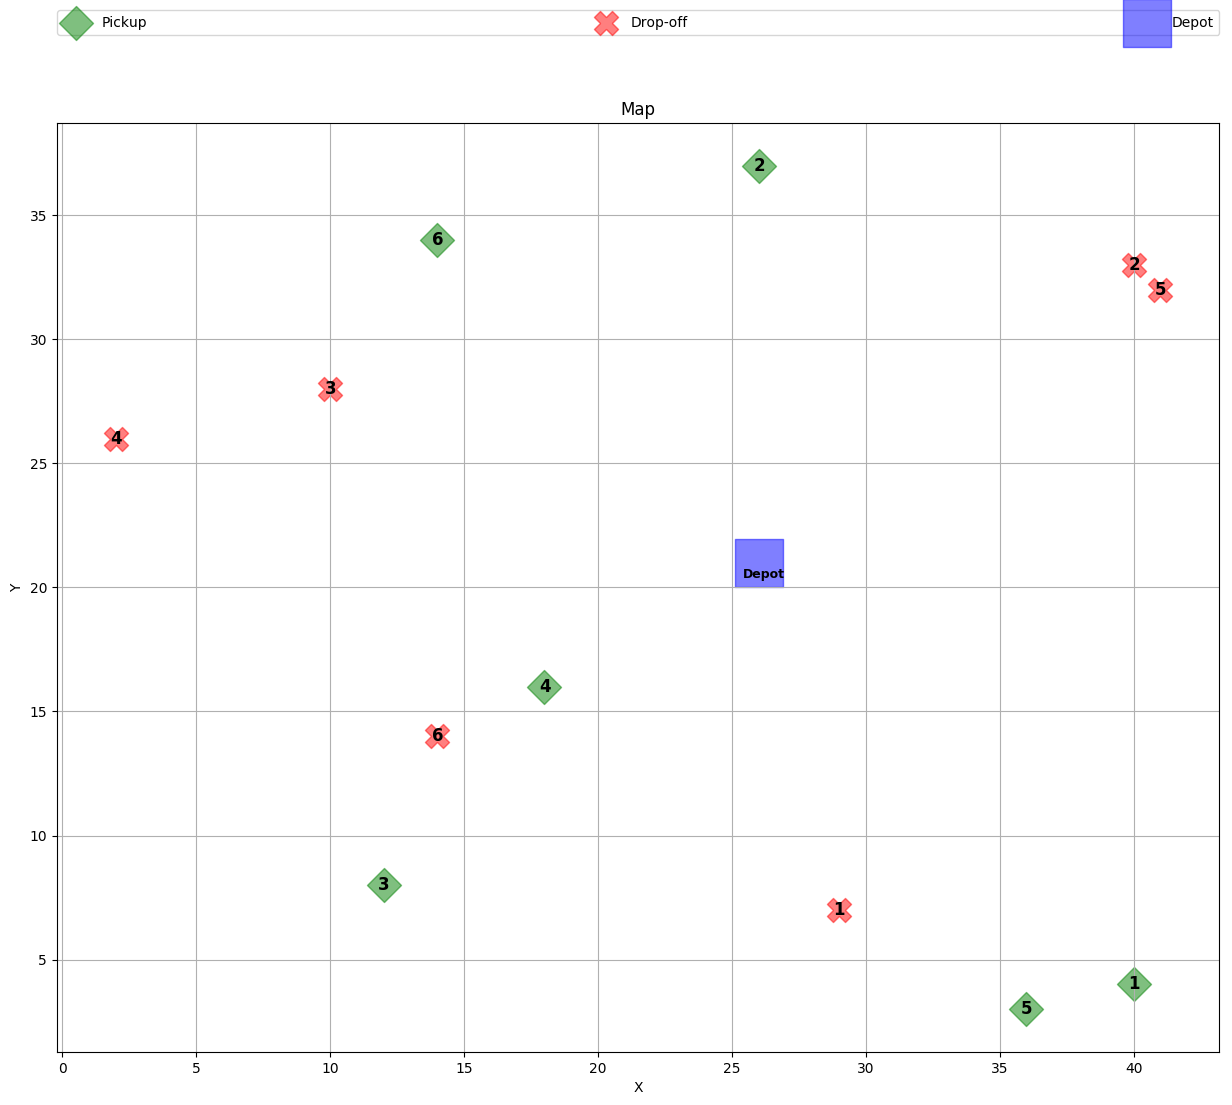

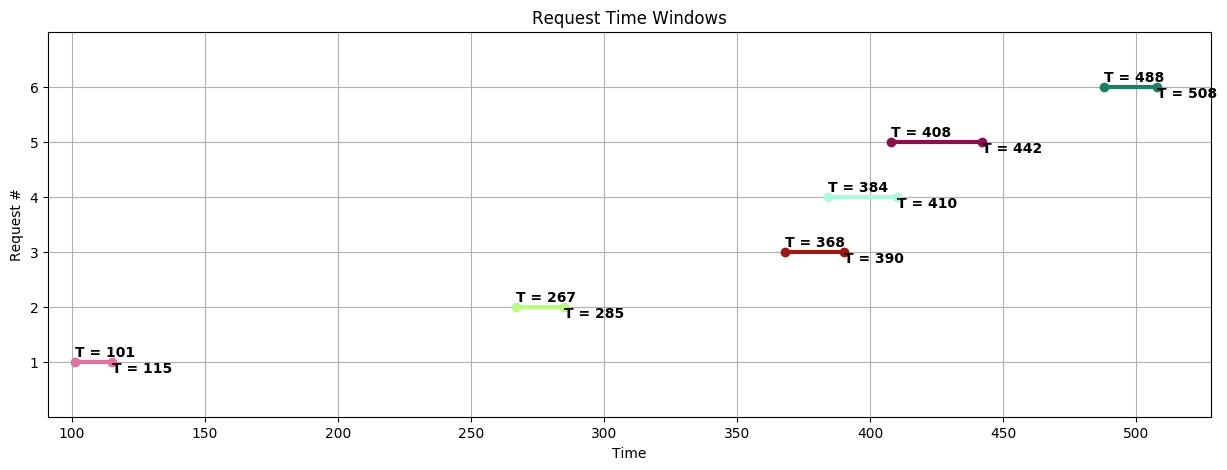

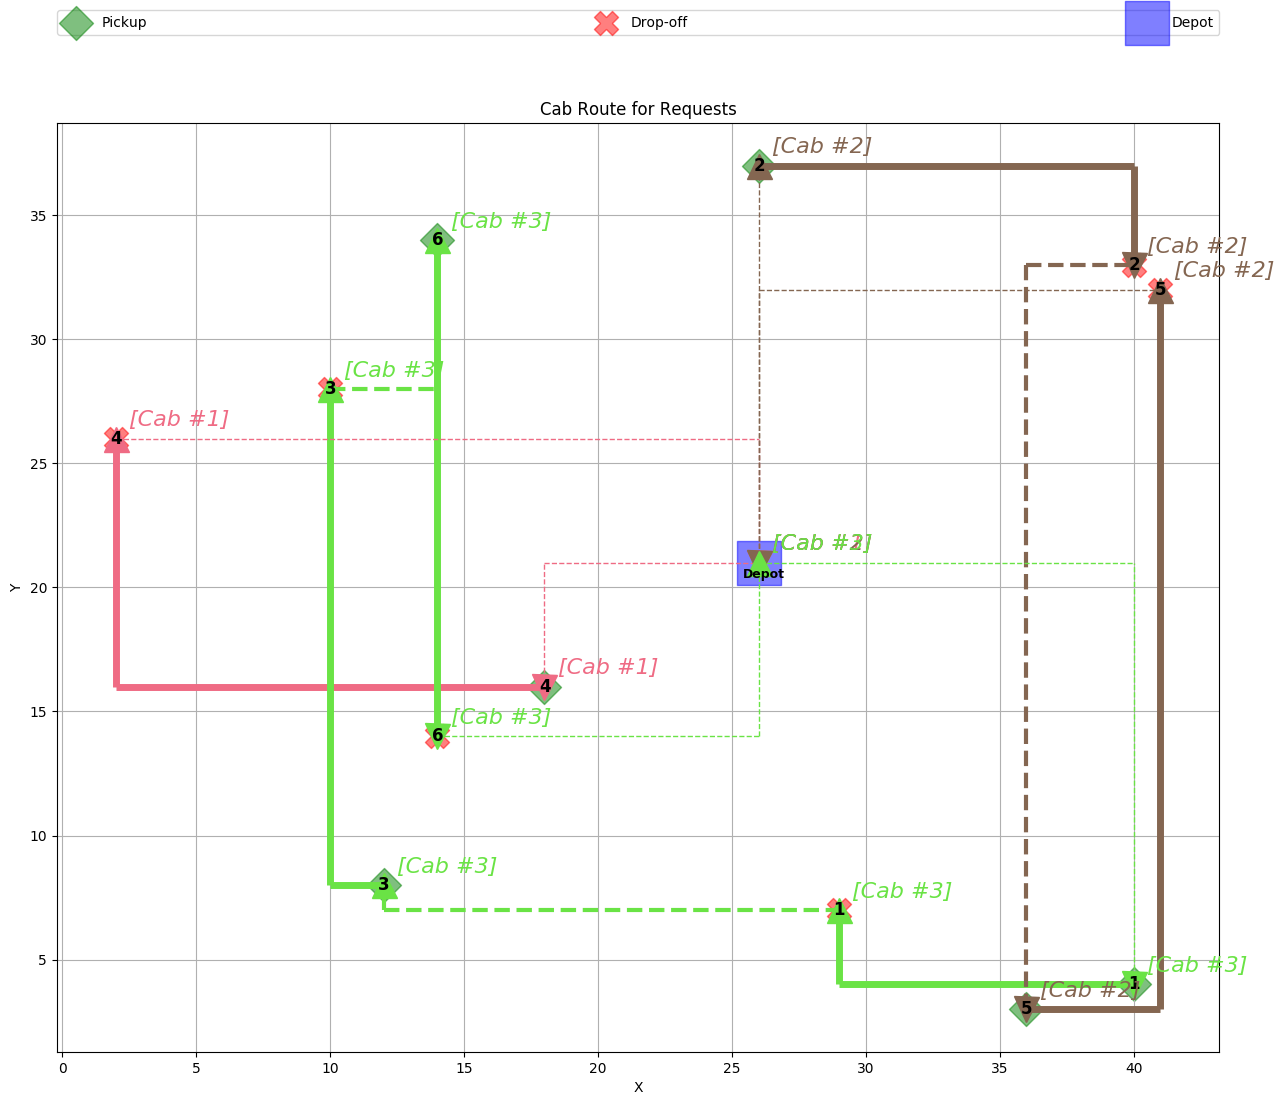

[1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
- x_best = 
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[-0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, -0.0, 1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, -0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
- d_best = [68.0, 128.0, 134.0, 0.0, 0.0, 0.0]


In [13]:
# 1st Scenerio setting
R = 6 # Number of requests
K = R # Number of cabs
lambda = 10000 # Weighting of the cab number for objective

requests, depot, mask = VRP_model(R, K, lambda)
plot_request_depot(requests, depot)
plot_Request_Time_Window(requests)
plot_car_route(requests, depot, mask)   

#### 2.) K = 10, R = 10, lambda = 10000
In this scenerio, our model handles 10 requests and 10 cabs.

1: Request((35, 17), 101, (18, 9), 25)
2: Request((32, 40), 116, (27, 30), 15)
3: Request((19, 17), 149, (50, 14), 34)
4: Request((31, 26), 151, (43, 11), 27)
5: Request((12, 32), 174, (16, 16), 20)
6: Request((22, 14), 224, (49, 2), 39)
7: Request((30, 9), 229, (37, 35), 33)
8: Request((8, 38), 351, (25, 30), 25)
9: Request((8, 6), 412, (29, 33), 48)
10: Request((40, 35), 490, (49, 15), 29)
Any["Depot", "P_1", "D_1", "P_2", "D_2", "P_3", "D_3", "P_4", "D_4", "P_5", "D_5", "P_6", "D_6", "P_7", "D_7", "P_8", "D_8", "P_9", "D_9", "P_10", "D_10"]


Academic license - for non-commercial use only
 

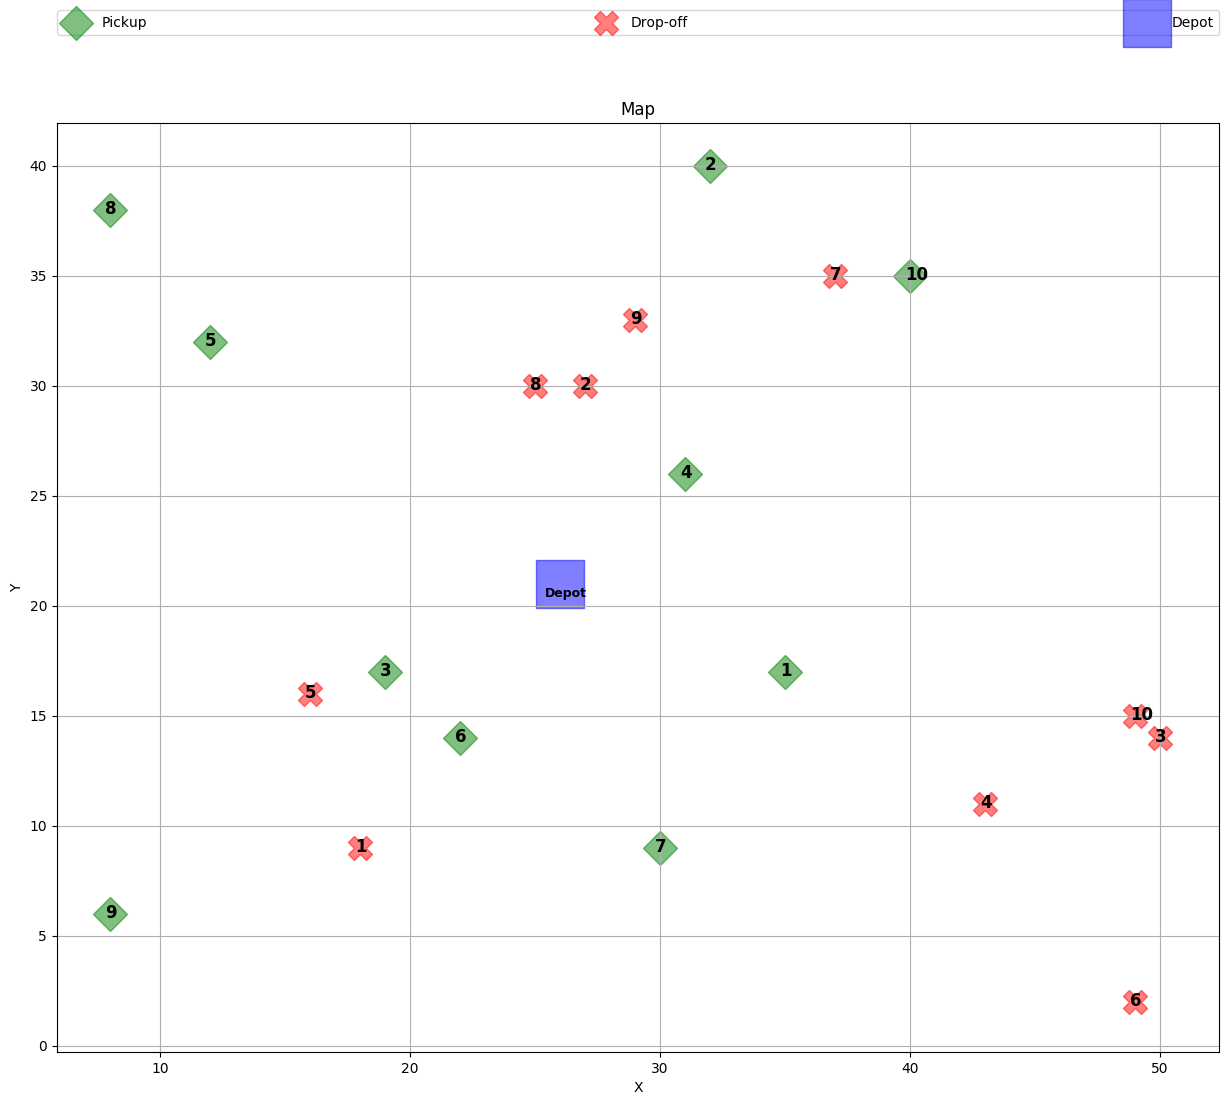

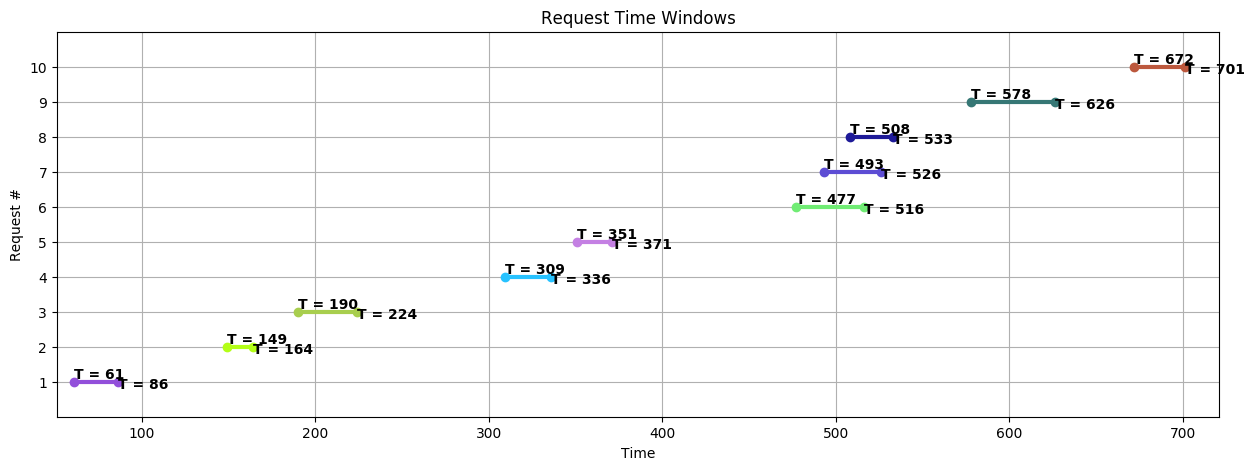

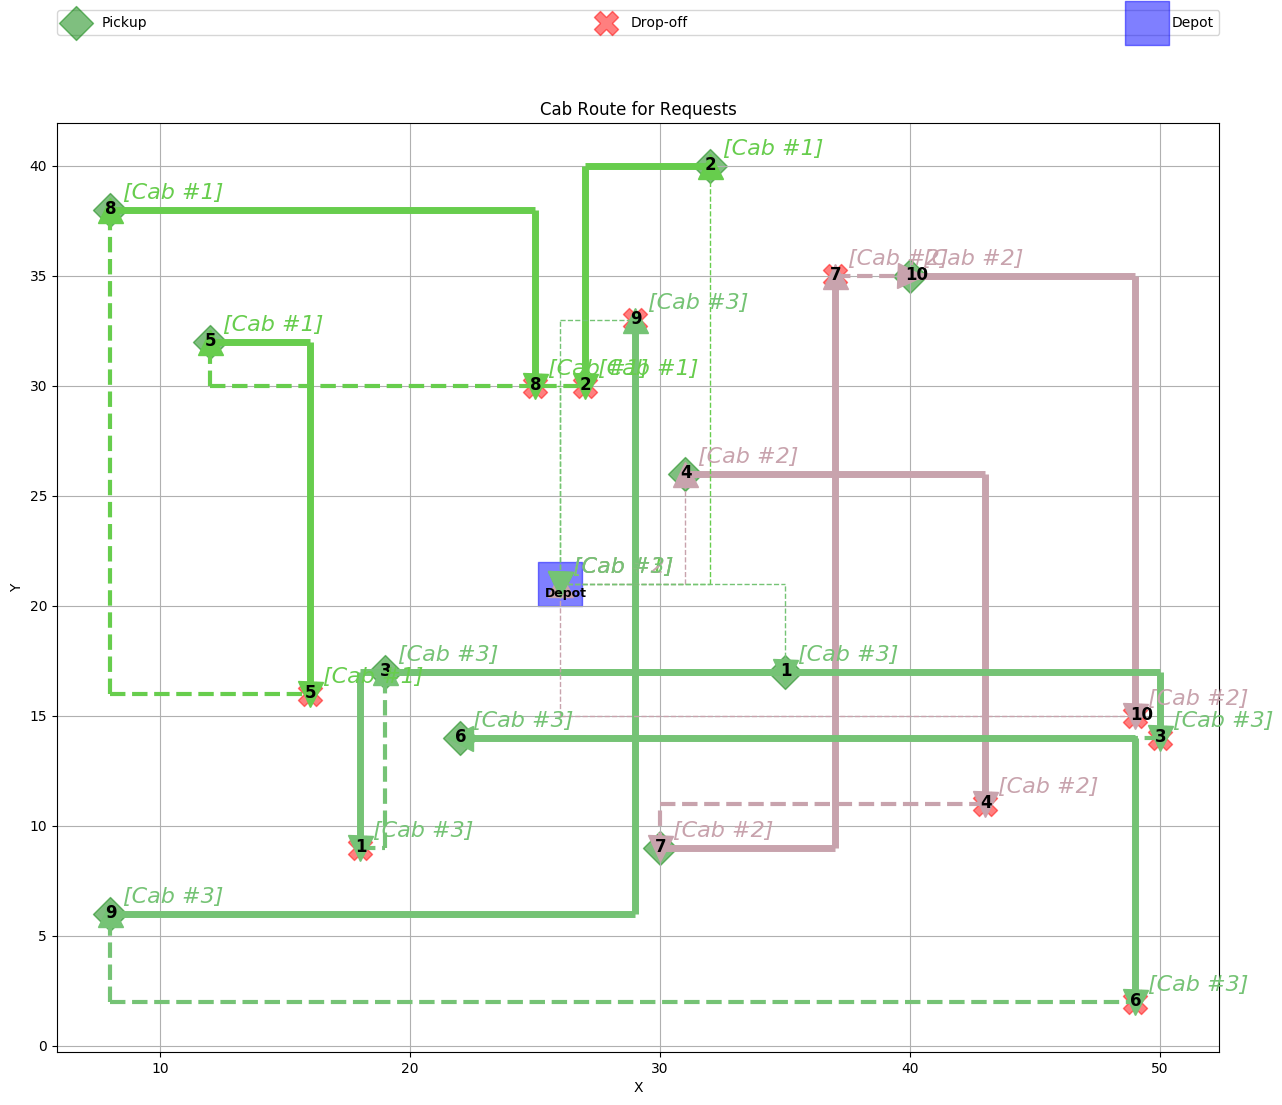

 5.172292 seconds (27.14 k allocations: 5.318 MiB)

Optimal solution: 
- objective_best = 30544.0
- y_best = [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
- x_best = 
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
- d_best = [142.0, 146.0, 256.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [14]:
# 2nd Scenerio setting
R = 10 # Number of requests
K = R # Number of cabs
lambda = 10000 # Weighting of the cab number for objective

requests, depot, mask = VRP_model(R, K, lambda)
plot_request_depot(requests, depot)
plot_Request_Time_Window(requests)
plot_car_route(requests, depot, mask)   

#### 3.) K = 8, R = 8, lambda = 10000
In this scenerio, our model handles 8 requests and 8 cabs. Also, we are comparing the difference in our results when we pose a limit on the number of requests each cab can handle.

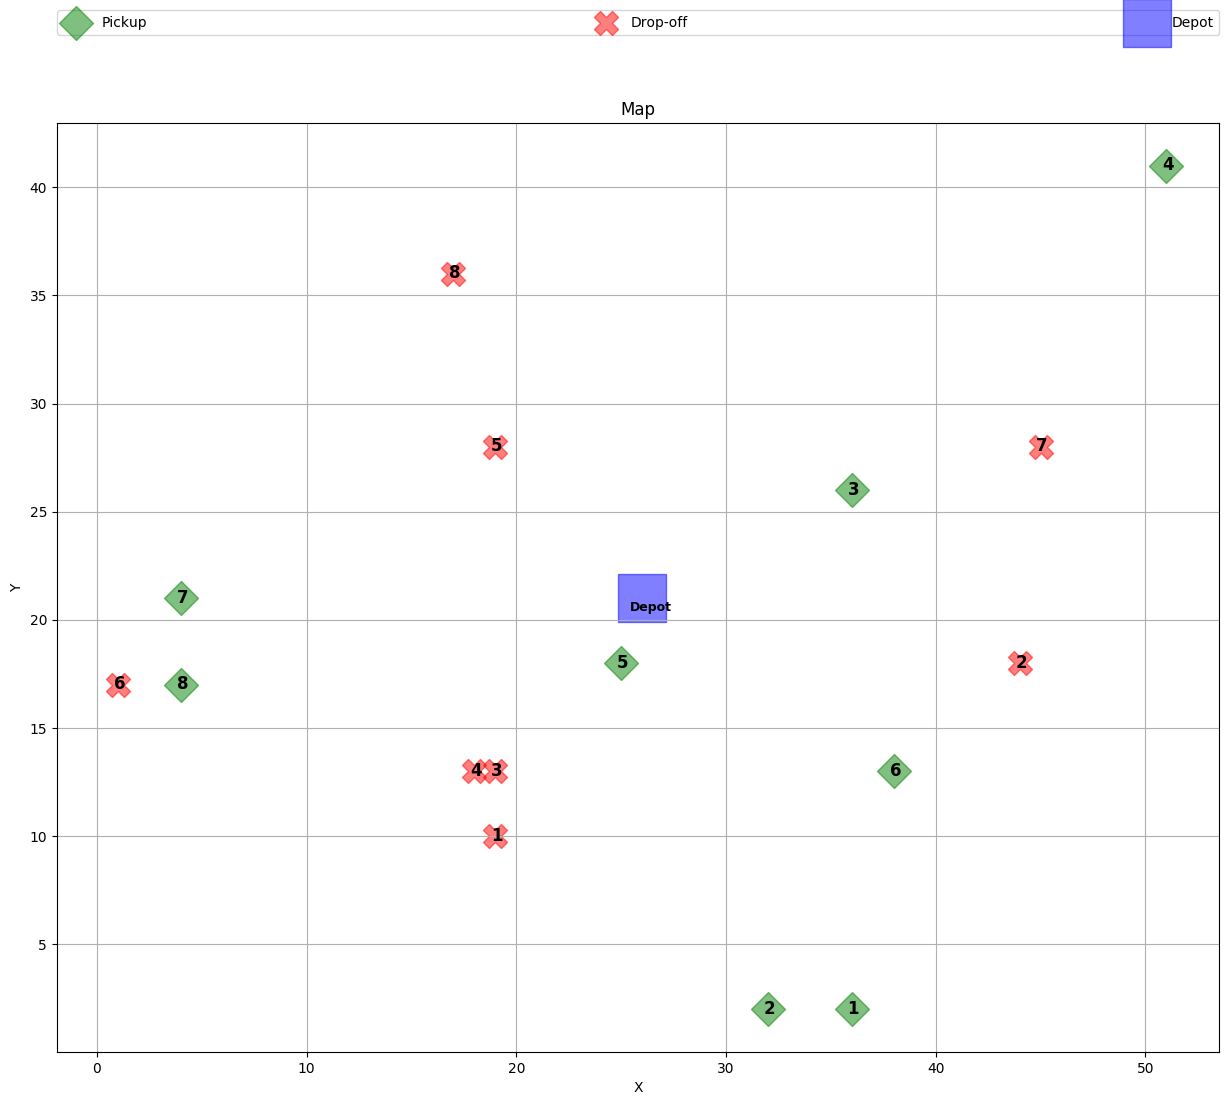

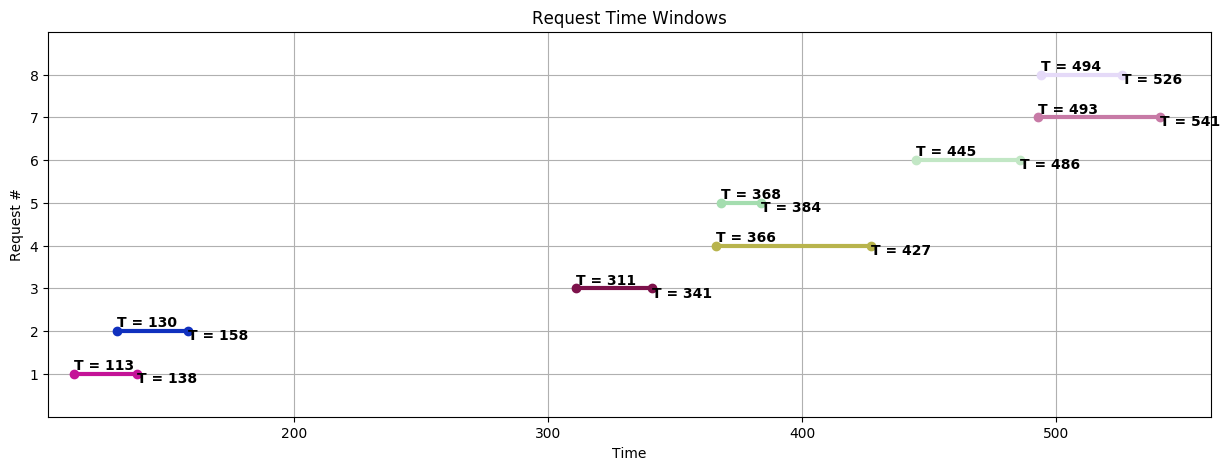

1: Request((36, 2), 84, (19, 10), 25)
2: Request((32, 2), 166, (44, 18), 28)
3: Request((36, 26), 242, (19, 13), 30)
4: Request((51, 41), 321, (18, 13), 61)
5: Request((25, 18), 340, (19, 28), 16)
6: Request((38, 13), 352, (1, 17), 41)
7: Request((4, 21), 390, (45, 28), 48)
8: Request((4, 17), 395, (17, 36), 32)
Any["Depot", "P_1", "D_1", "P_2", "D_2", "P_3", "D_3", "P_4", "D_4", "P_5", "D_5", "P_6", "D_6", "P_7", "D_7", "P_8", "D_8"]




In [15]:
# Scenario 3
# Generating the same request for both contrained and unconstrained requests served by the cabs

R = 8 # Number of requests
K = R # Number of cabs
lambda = 10000 # Weighting of the cab number for objective

requests, depot, dist_map, p_t, p_l, d_t, d_l, duration = generate_requests(R)
plot_request_depot(requests, depot)
plot_Request_Time_Window(requests)

### (i) No limit on requests served by cabs

Academic license - for non-commercial use only
 

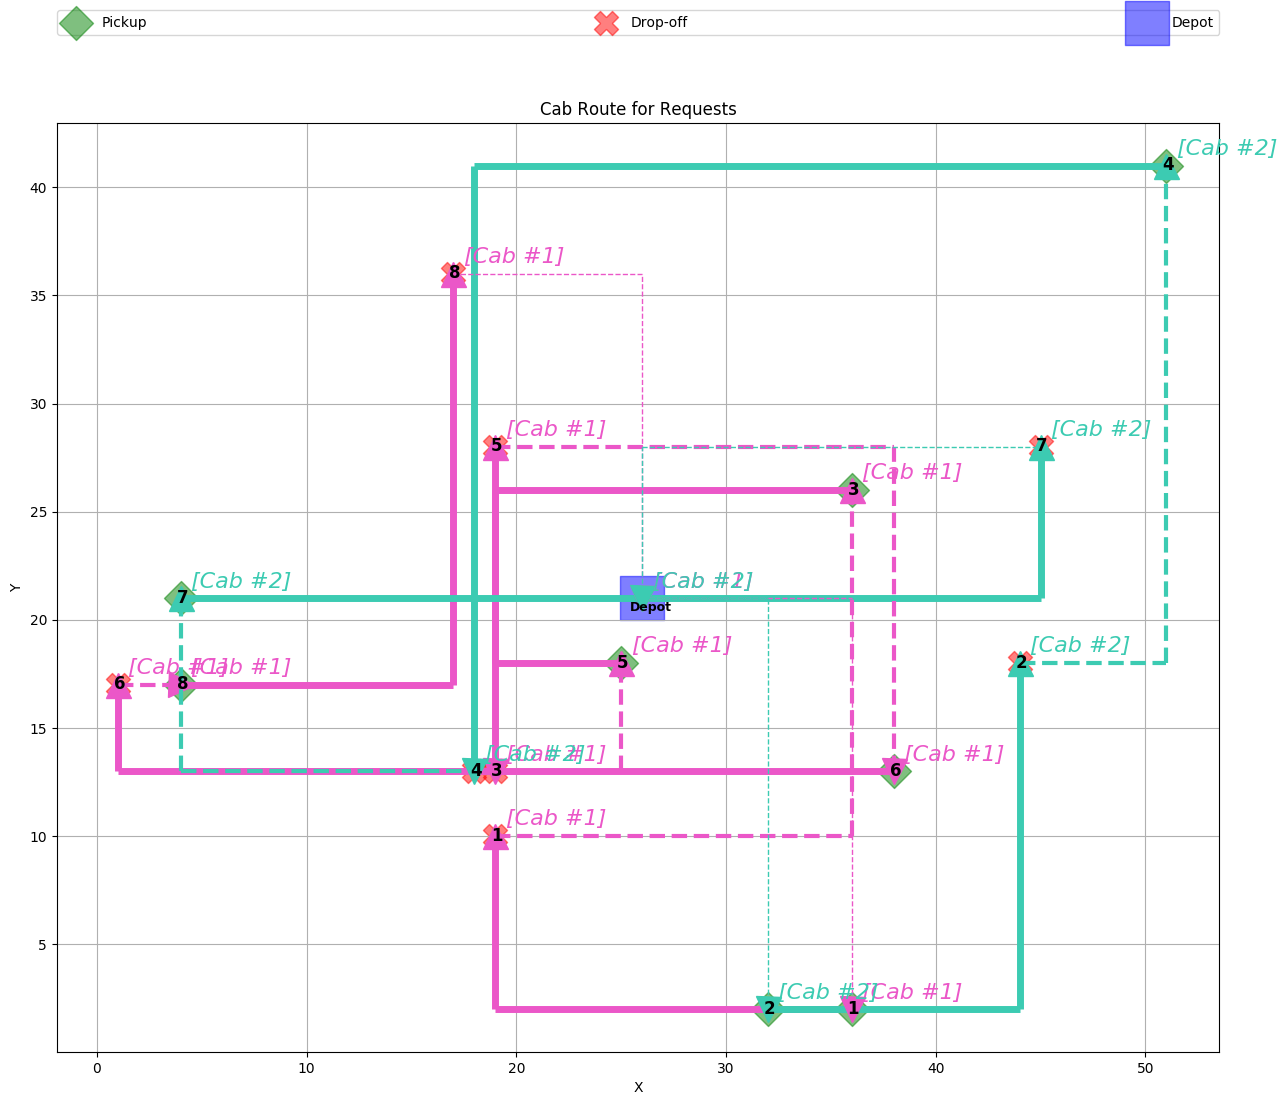

 0.787033 seconds (13.47 k allocations: 2.722 MiB)

Optimal solution: 
- objective_best = 20518.0
- y_best = [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
- x_best = 
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
- d_best = [278.0, 240.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [16]:
# Set limit by default = 0
y_best1, d_best1, mask_best1 = optmize_VRP_model(requests, depot, dist_map, p_t, p_l, d_t, d_l, duration, R, K, lambda)
plot_car_route(requests, depot, mask_best1)

### (ii) Limit on requests served by cabs
#### K = 8, R = 8, lambda = 10000, limit = 2

Academic license - for non-commercial use only
 

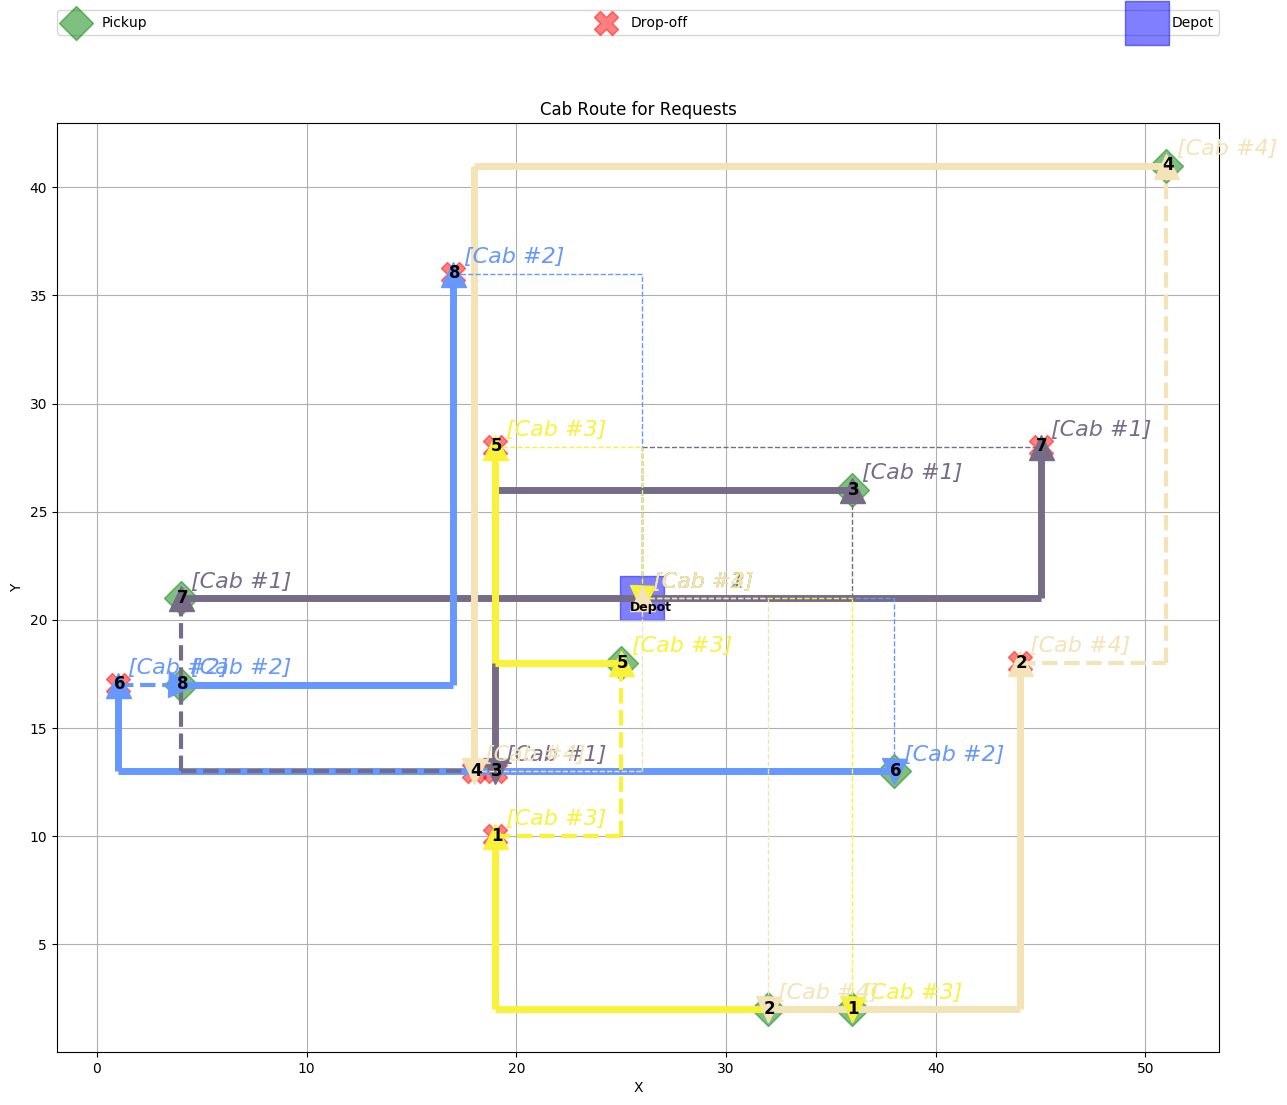

 1.834385 seconds (13.51 k allocations: 2.728 MiB, 0.62% gc time)

Optimal solution: 
- objective_best = 40520.00000000001
- y_best = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
- x_best = 
[-1.55431e-15, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
- d_best = [142.0, 120.0, 98.0, 160.0, 0.0, 0.0, 0.0, 0.0]


In [17]:
# Set limit to 2

limit = 2
y_best2, d_best2, mask_best2 = optmize_VRP_model(requests, depot, dist_map, p_t, p_l, d_t, d_l, duration, R, K, lambda, limit)
plot_car_route(requests, depot, mask_best2)

### 4.B. Tradeoff analysis ###
Now we are going to compare the difference in our result when we set lambda to different values. When lambda = 0, we put more emphasis on optimizing the total travelling distance; when lambda is large, we want to focus on optimizing the total amount of cabs dispatched, in other words, we want to dispatch as less cabs as possible.


For this, we generate 6 requests. Given the scheduling of cabs to each request is randomized and highly depend on the time windows, it is not necessary we generate requests which exemplifies the tradeoff. Thus, to show the tradeoff analysis, we found a perfect example and would illustrate that example.

In [18]:
function get_requests(R)
    depot = Depot[Depot((26, 20))]
    requests = []
    
    
    push!(requests, Request((14, 8), 73, (9, 7), 6))
    push!(requests, Request((23, 18), 80, (1, 11), 17))
    push!(requests, Request((35, 24), 178, (45, 18), 16))
    push!(requests, Request((26, 30), 277, (14, 8), 46))
    push!(requests, Request((30, 12), 362, (1, 38), 55))
    push!(requests, Request((47, 13), 421, (17, 33), 50))
             
    plot_request_depot(requests, depot)
    
    println(length(requests))
    # Get Location coordinates.
    nodes = getLocations(depot, requests)

    # Compute distance matrix
    dist_map = distance_matrix(nodes, length(requests));

    # Find max distance from the depot to a pickup and use it as the reference time to start the TimeSlots for requests
    maxDistFromDepot = maximum(dist_map[:,1])

    # Now, assign random time slots beginning from maxDistFromDepot to all requests.
    #requests = assign_pickup_time(maxDistFromDepot, requests)
    
    plot_Request_Time_Window(requests)   # Calling this function here coz of modified slots.

    p_t = []
    p_l = []
    d_t = []
    d_l = []
    duration = []

    println("")
    for r = 1:R
        push!(p_t, requests[r].pickup_time)
        push!(p_l, requests[r].pickup_pos)
        push!(d_t, requests[r].pickup_time + requests[r].duration)
        push!(d_l, requests[r].dropoff_pos)
        push!(duration, requests[r].duration)
    end
    #println("")
    #println("pickup time = ", p_t)
    #println("pickup location = ", p_l)
    #println("dropoff time = ", d_t)
    #println("dropoff location = ", d_l)
    #println("duration = ", duration)
    return requests, depot, dist_map, p_t, p_l, d_t, d_l, duration
end

get_requests (generic function with 1 method)

6
Any["Depot", "P_1", "D_1", "P_2", "D_2", "P_3", "D_3", "P_4", "D_4", "P_5", "D_5", "P_6", "D_6"]



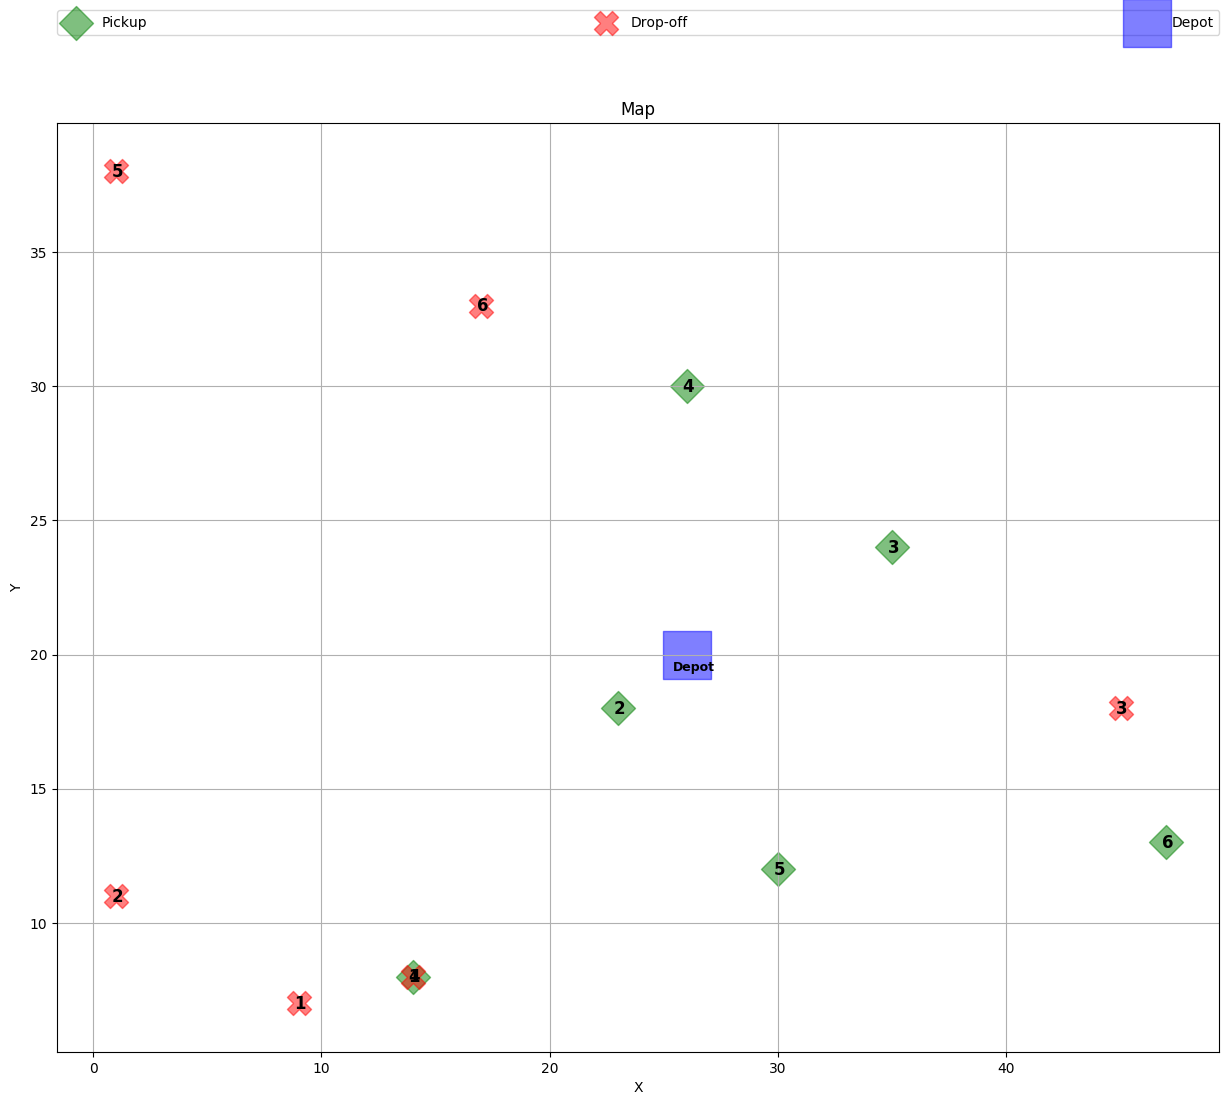

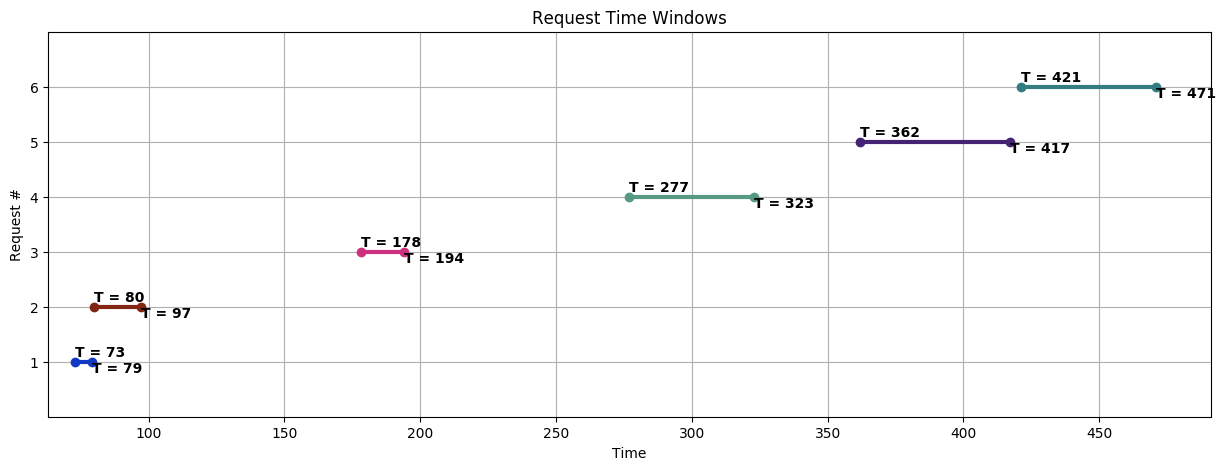

(Any[Request((14, 8), 73, (9, 7), 6), Request((23, 18), 80, (1, 11), 17), Request((35, 24), 178, (45, 18), 16), Request((26, 30), 277, (14, 8), 46), Request((30, 12), 362, (1, 38), 55), Request((47, 13), 421, (17, 33), 50)], Depot[Depot((26, 20))], 13×13 Named Array{Float64,2}
From ╲ To │ Depot    P_1    D_1    P_2  …    P_5    D_5    P_6    D_6
──────────┼──────────────────────────────────────────────────────────
Depot     │   0.0   24.0   30.0    5.0  …   12.0   43.0   28.0   22.0
P_1       │  24.0    0.0    6.0   19.0      20.0   43.0   38.0   28.0
D_1       │  30.0    6.0    0.0   25.0      26.0   39.0   44.0   34.0
P_2       │   5.0   19.0   25.0    0.0      13.0   42.0   29.0   21.0
D_2       │  34.0   16.0   12.0   29.0      30.0   27.0   48.0   38.0
P_3       │  13.0   37.0   43.0   18.0      17.0   48.0   23.0   27.0
D_3       │  21.0   41.0   47.0   22.0      21.0   64.0    7.0   43.0
P_4       │  10.0   34.0   40.0   15.0      22.0   33.0   38.0   12.0
D_4       │  24.0    0

In [19]:
R = 6
K = R
requests, depot, dist_map, p_t, p_l, d_t, d_l, duration = get_requests(R)


 ### Now we set lambda to 0. ###

Academic license - for non-commercial use only
 

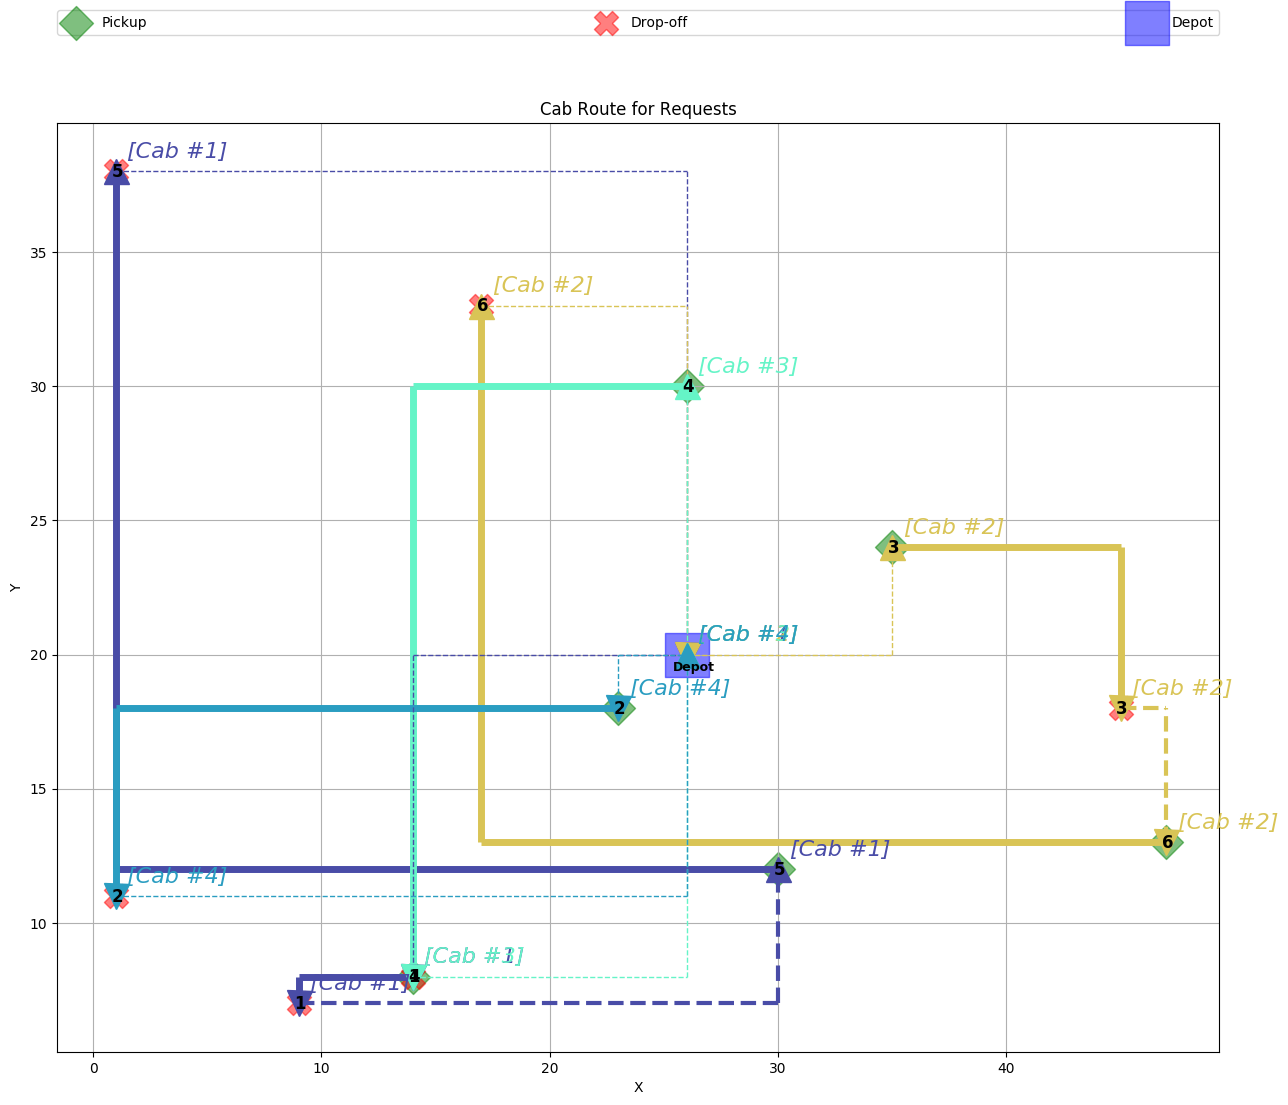

23.204236 seconds (5.34 k allocations: 1.164 MiB)

Optimal solution: 
- objective_best = 398.0
- y_best = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0]
- x_best = 
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
- d_best = [154.0, 108.0, 68.0, 68.0, 0.0, 0.0]


In [20]:
lambda = 0 # Weighting of the cab number for objective
y_best, d_best, mask_best = optmize_VRP_model(requests, depot, dist_map, p_t, p_l, d_t, d_l, duration, R, K, lambda)
plot_car_route(requests, depot, mask_best)

 ### Now we set lambda to 1000000. ###

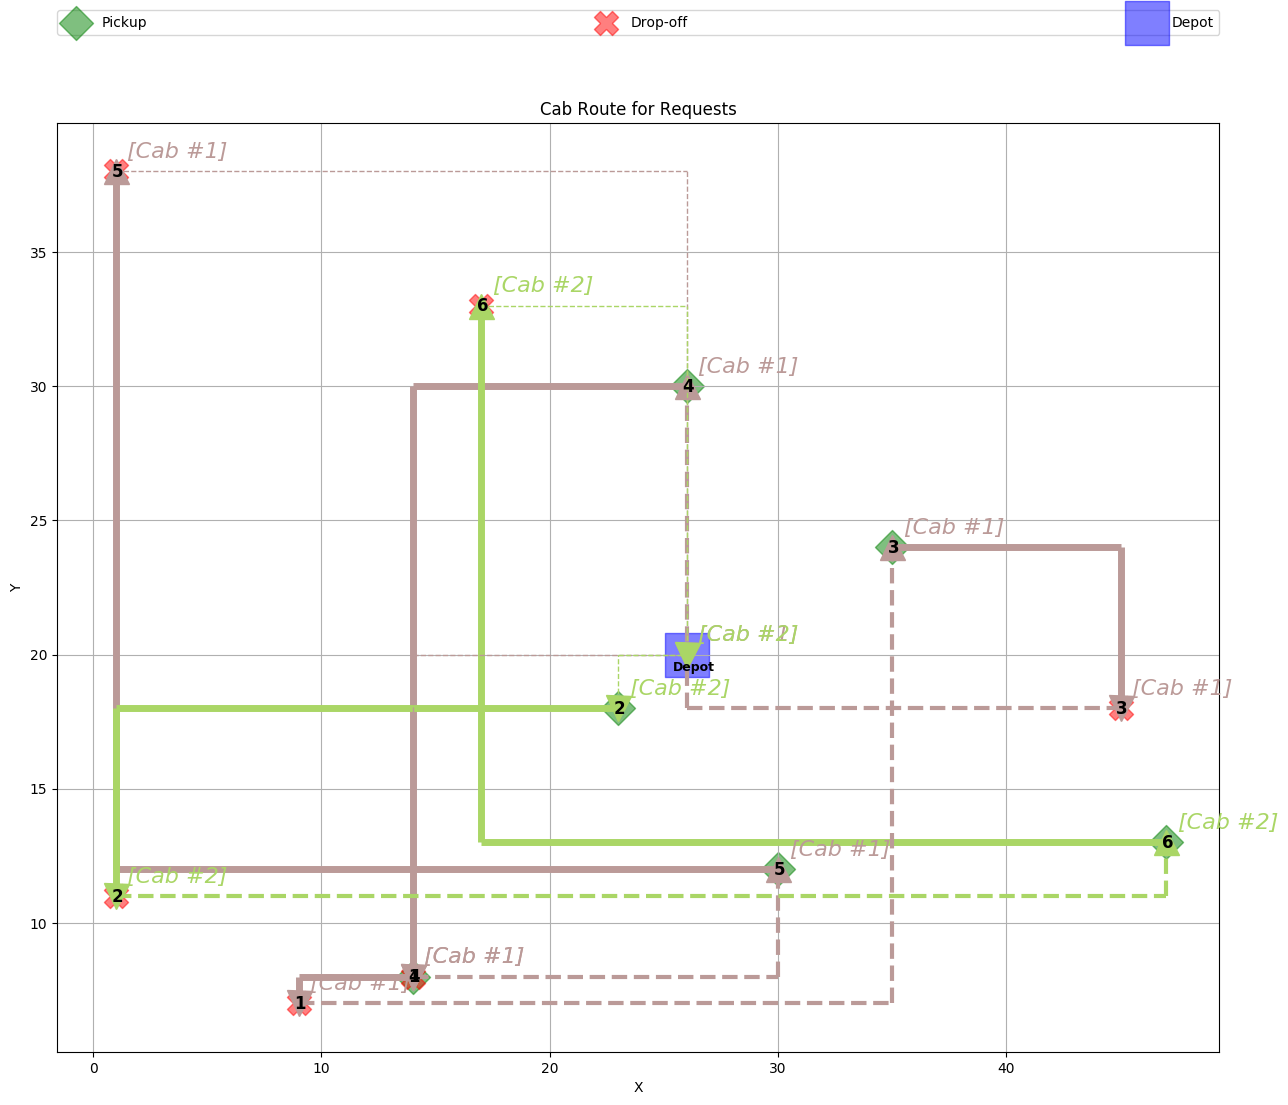

Academic license - for non-commercial use only
  0.193865 seconds (5.34 k allocations: 1.164 MiB)

Optimal solution: 
- objective_best = 2.000426e6
- y_best = [1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
- x_best = 
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
- d_best = [272.0, 154.0, 0.0, 0.0, 0.0, 0.0]


In [21]:
lambda = 1000000 # Weighting of the cab number for objective
y_best, d_best, mask_best = optmize_VRP_model(requests, depot, dist_map, p_t, p_l, d_t, d_l, duration, R, K, lambda)
plot_car_route(requests, depot, mask_best)

As can be seen from the result, when lambda = 1000000, y_best = [1.0, 1.0, 0.0, 0.0, 0.0, 0.0], we are dispatching 2 cabs, and the total distance travelled is 426.
Therefore, when lambda is really large, we have fewer cabs dispatched but the total distance travelled is also increased; when lambda is 0 we have more cabs dispatched but travel less total distance.

## 5. Conclusion ##

In this project, we explored an optimization model to schedule rides so that we achieve an optimal solution where the total distance covered by the cabs are minimal (could spend less money on fuel). An interesting expansion of this project is that one cab could serve multiple passengers, in other words, people can share rides. It is a very useful real world application. Applications like uberPOOL has the ability to match customers heading the same directions on a same cab.

## 6. References ##

1. L. Grandinetti, F. Guerriero, F. Pezzella, O. Pisacane, The Multi-objective Multi-vehicle Pickup and Delivery Problem with Time Windows, Procedia - Social and Behavioral Sciences, Volume 111, 2014, Pages 203-212, ISSN 1877-0428, https://doi.org/10.1016/j.sbspro.2014.01.053. (http://www.sciencedirect.com/science/article/pii/S1877042814000548)

2. Manar I. Hosny, Christine L. Mumford,Constructing initial solutions for the multiple vehicle pickup and delivery problem wh time windows,Journal of King Saud University - Computer and Information Sciences, Volume 24, Issue 1, 2012, Pages 59-69, ISSN 1319-1578,https://doi.org/10.1016/j.jksuci.2011.10.006.http://www.sciencedirect.com/science/article/pii/S131915781100036X)
